In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
sns.set()
import matplotlib.pyplot as plt

In [2]:
def read_csv(file_path, has_header=True):
    with open(file_path) as f:
        if has_header: f.readline()
        data = []
        for line in f:
            line = line.strip().split(",")
            data.append([x for x in line])
    return data

In [3]:
datasetfile = "ML/training/GCDay1stats.csv"

In [4]:
dataset = read_csv(datasetfile)
X = np.array([z[1:] for z in dataset])
y = np.array([z[0] for z in dataset])

In [5]:
snis, counts = np.unique(y, return_counts=True)

In [6]:
top_ten = sorted(zip(counts, snis))[-10:]
counts = [x for x, _ in top_ten]
top_snis = [x for _, x in top_ten]

Text(0,0.5,'Connections')

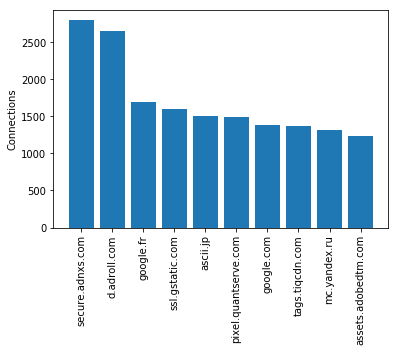

In [8]:
plt.bar([x for x in reversed(top_snis)], [x for x in reversed(counts)])
plt.xticks(rotation=90)
plt.ylabel('Connections')

In [153]:
dataset = read_csv('final_results.csv')
df = pd.DataFrame(dataset)


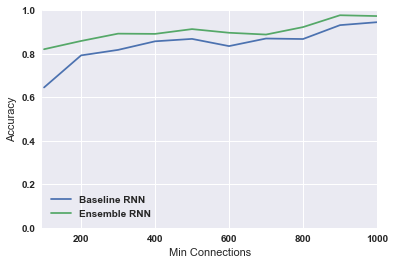

In [154]:
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['Baseline RNN', 'Ensemble RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp, label=k1)
    plt.xlabel('Min Connections')
    plt.ylabel('Accuracy')
    plt.ylim(0.0,1)
    plt.xlim(95,1000)
    plt.legend()

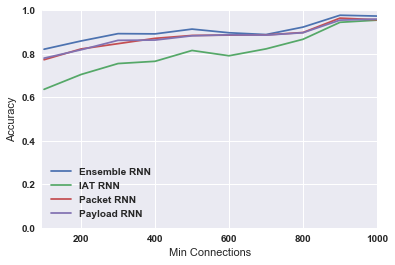

In [155]:
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['IAT RNN', 'Packet RNN', 'Payload RNN', 'Ensemble RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp, label=k1)
    plt.xlabel('Min Connections')
    plt.ylabel('Accuracy')
    plt.ylim(0.0,1)
    plt.xlim(95,1000)
    plt.legend()

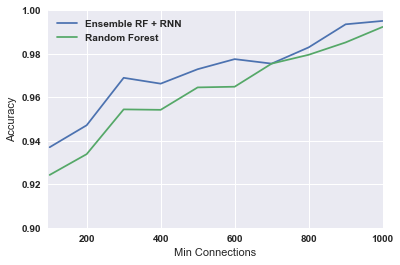

In [158]:
for k1, v1 in df.groupby([0], as_index=False):
    if k1 not in ['Random Forest', 'Ensemble RF + RNN']:
        continue
    x = []
    y = []
    for k2, v2 in v1.groupby([1], as_index=False):
        x.append(pd.to_numeric(k2))
        y.append(pd.to_numeric(v2[2]).mean())
    
    xp = [i for i, _ in sorted(zip(x,y))]
    yp = [i for _, i in sorted(zip(x,y))]
    plt.plot(xp, yp, label=k1)
    plt.xlabel('Min Connections')
    plt.ylabel('Accuracy')
    plt.ylim(0.9,1)
    plt.xlim(95,1000)
    plt.legend()

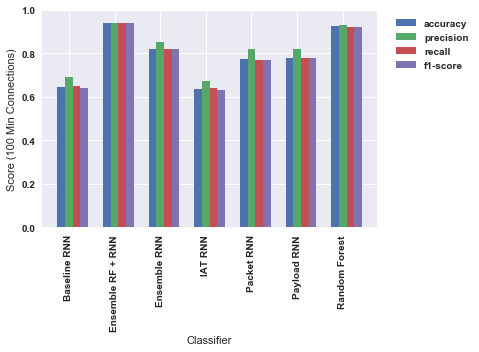

In [148]:
x = []
y1 = []
y2 = []
y3 = []
y4 = []
for k1, v1 in df.groupby([0], as_index=False):
    x.append(k1)
    for k2, v2 in v1.groupby([1], as_index=False):
        if pd.to_numeric(k2) != 100:
            continue
        y1.append(pd.to_numeric(v2[2]).mean())
        y2.append(pd.to_numeric(v2[3]).mean())
        y3.append(pd.to_numeric(v2[4]).mean())
        y4.append(pd.to_numeric(v2[5]).mean())
    
indices = np.arange(len(x))
width = np.min(np.diff(indices)) / 6.0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices-width,y1,width,label='accuracy')
ax.bar(indices,y2,width,label='precision')
ax.bar(indices+width,y3,width,label='recall')
ax.bar(indices+width+width,y4,width,label='f1-score')
ax.set_xlabel('Classifier')
ax.set_ylabel('Score (100 Min Connections)')
ax.set_xticklabels(['Baseline RNN'] + x, rotation=90)
ax.set_ylim(0.0,1)
ax.legend(bbox_to_anchor=(0.5, 0.0, 0.8, 1.0))

In [160]:
dataset = read_csv('class_results.csv', has_header=False)
df = pd.DataFrame(dataset)

['ascii.jp', 'assets.adobedtm.com', 'beacon.krxd.net', 'd.adroll.com', 'facebook.com', 'google.com', 'google.fr', 'mc.yandex.ru', 'nexus.ensighten.com', 'pixel.quantserve.com', 'secure.adnxs.com', 'ssl.gstatic.com', 'tags.tiqcdn.com']


'\nfor item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):\n    item.set_fontsize(12)\n'

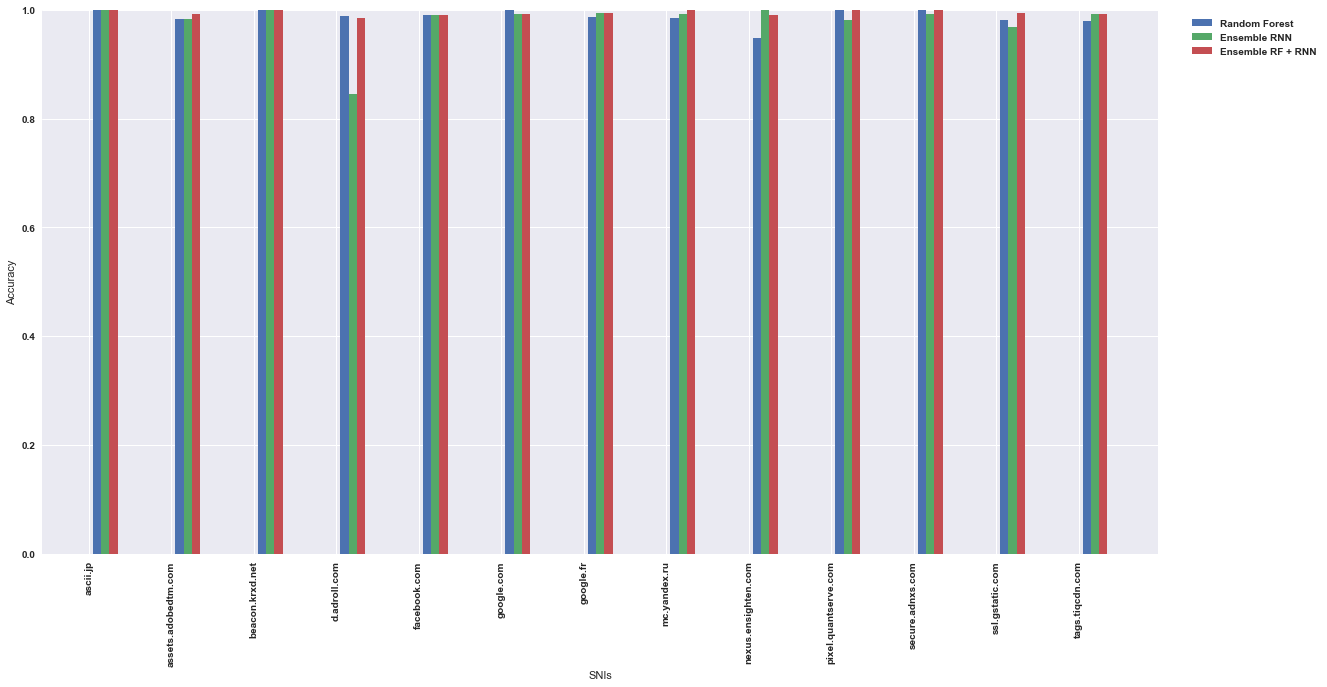

In [163]:
x = []
y = []
snis = []
header = True
for row in df.iterrows():
    index, data = row
    if header:
        snis = data.tolist()[1:]
        header = False
        continue
    
    acc = [float(i) for i in data.tolist()[1:]]
    y.append(acc)
    x.append(data.tolist()[0])
    
indices = np.arange(len(y[0]))
width = np.min(np.diff(indices)) / 10.0

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.bar(indices+width,y[0],width,label=x[0])
#ax.bar(indices-width-width,y[1],width,label=x[1])
#ax.bar(indices-width,y[2],width,label=x[2])
#ax.bar(indices,y[3],width,label=x[3])
#ax.bar(indices+width,y[4],width,label=x[4])
ax.bar(indices+width+width,y[5],width,label=x[5])
ax.bar(indices+width+width+width,y[6],width,label=x[6])
ax.set_xlabel('SNIs')
ax.set_ylabel('Accuracy')
ax.set_xticks(range(len(y[0])))
ax.set_xticklabels(snis, rotation=90)
ax.set_ylim(0.0,1)
ax.legend(bbox_to_anchor=(0.5, 0.0, 0.65, 1.0))

print snis

"""
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
"""

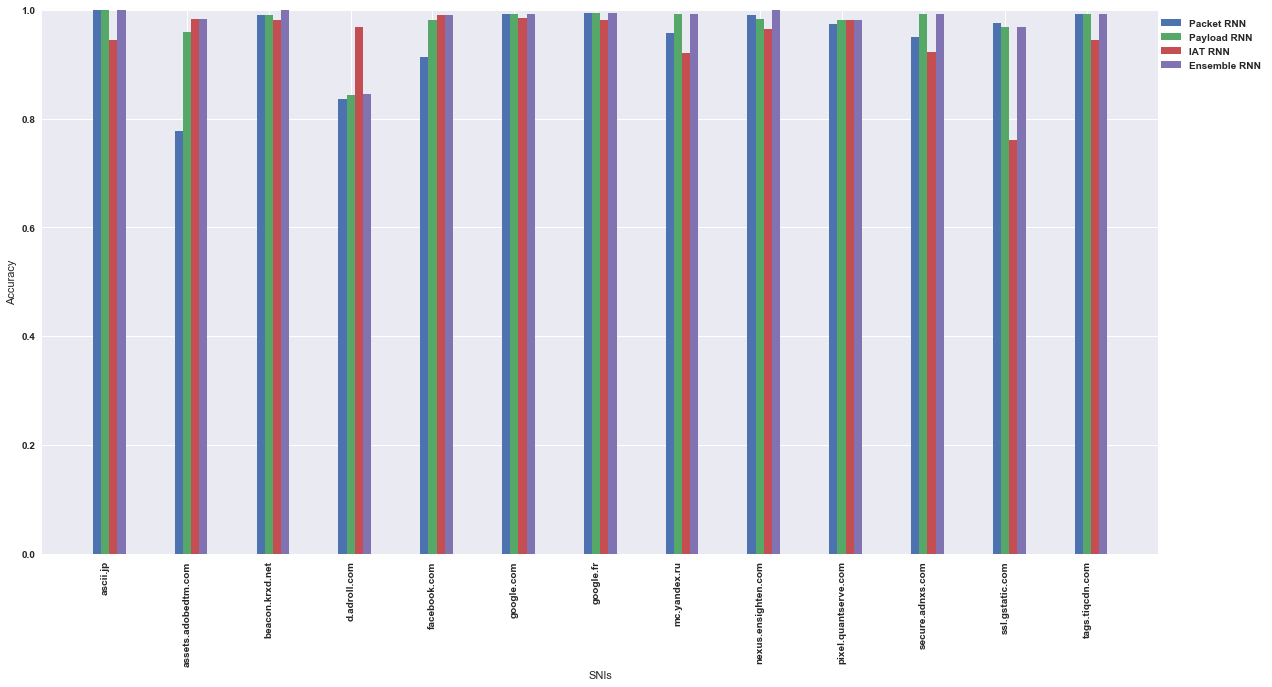

In [162]:
indices = np.arange(len(y[0]))
width = np.min(np.diff(indices)) / 10.0

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
#ax.bar(indices+width,y[0],width,label=x[0])
#ax.bar(indices-width-width,y[1],width,label=x[1])
ax.bar(indices-width,y[2],width,label=x[2])
ax.bar(indices,y[3],width,label=x[3])
ax.bar(indices+width,y[4],width,label=x[4])
ax.bar(indices+width+width,y[5],width,label=x[5])
#ax.bar(indices+width+width+width,y[6],width,label=x[6])
ax.set_xlabel('SNIs')
ax.set_ylabel('Accuracy')
ax.set_xticks(range(len(y[0])))
ax.set_xticklabels(snis, rotation=90)
ax.set_ylim(0.0,1)
ax.legend(bbox_to_anchor=(0.5, 0.0, 0.6, 1.0))